In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df1 = pd.read_csv("/content/diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# Columns with invalid zero values
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with NaN in the specified columns
df1[invalid_zero_cols] = df1[invalid_zero_cols].replace(0, np.nan)

# Fill NaN values with the median of each column
df1[invalid_zero_cols] = df1[invalid_zero_cols].fillna(df1[invalid_zero_cols].median())

# Print missing values count
print("Missing values after cleaning:")
print(df1.isna().sum())


Missing values after cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Dropping rows with any missing value would remove too much data (especially due to Insulin and SkinThickness), leaving you with a smaller and potentially biased dataset.

Median imputation is robust to outliers and a good choice for skewed health data.

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

#Setting seed and took a random 25 observations

In [54]:
import random

# Set seed for reproducibility
random.seed(42)

# Get a random sample of 25 rows
sample_25 = df.iloc[random.sample(range(len(df)), 25)]

In [55]:
sample_glucose_mean = sample_25["Glucose"].mean()
sample_glucose_max = sample_25["Glucose"].max()


In [56]:
population_glucose_stats = df["Glucose"].agg(['mean', 'max'])
population_glucose_mean = population_glucose_stats['mean']
population_glucose_max = population_glucose_stats['max']

PLotting Data

In [57]:
labels = ["Mean Glucose", "Max Glucose"]
values = {
    "Sample": [sample_glucose_mean, sample_glucose_max],
    "Population": [population_glucose_mean, population_glucose_max]
}

x = np.arange(len(labels))  # the label locations
bar_width = 0.35


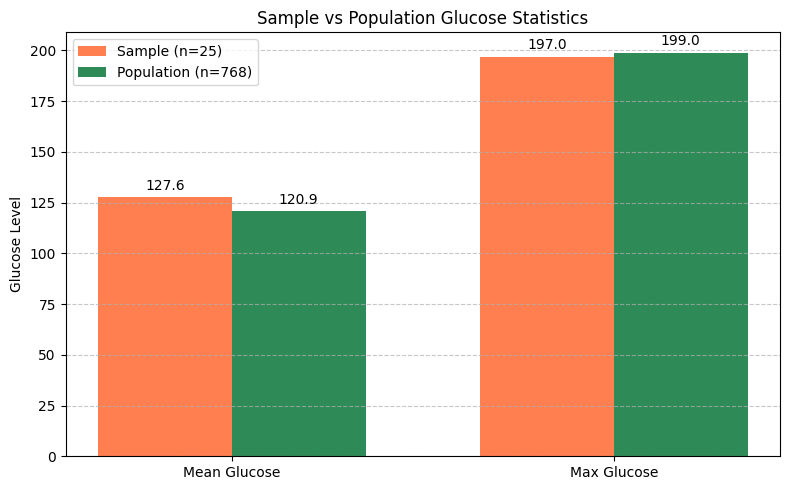

In [58]:
fig, ax = plt.subplots(figsize=(8, 5))

bars_sample = ax.bar(x - bar_width / 2, values["Sample"], bar_width, label='Sample (n=25)', color='coral')
bars_population = ax.bar(x + bar_width / 2, values["Population"], bar_width, label='Population (n=768)', color='seagreen')


ax.set_ylabel('Glucose Level')
ax.set_title('Sample vs Population Glucose Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.bar_label(bars_sample, fmt='%.1f', padding=3)
ax.bar_label(bars_population, fmt='%.1f', padding=3)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

In [59]:
sample_bmi_98 = np.percentile(sample_25["BMI"], 98)
population_bmi_98 = np.percentile(df["BMI"], 98)

#Plotting

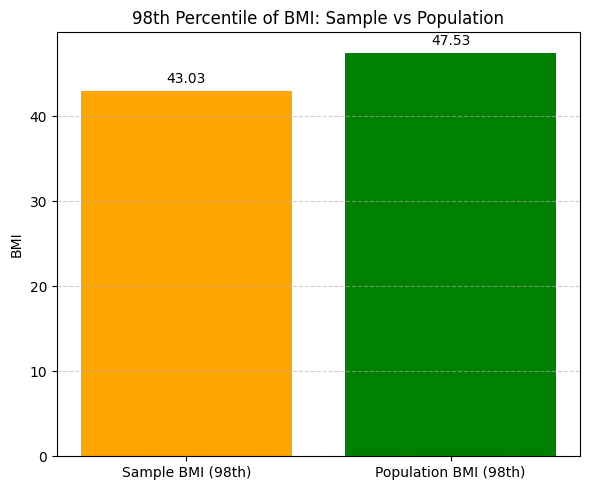

In [60]:
labels = ['Sample BMI (98th)', 'Population BMI (98th)']
values = [sample_bmi_98, population_bmi_98]  # Make sure these variables are defined
colors = ['orange', 'green']

# Plotting
fig, ax = plt.subplots(figsize=(6, 5))

# Create the bar chart
bars = ax.bar(labels, values, color=colors)

# Set labels and title
ax.set_ylabel('BMI')
ax.set_title('98th Percentile of BMI: Sample vs Population')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}',
            ha='center', va='bottom', fontsize=10)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

In [61]:
np.random.seed(42)


In [62]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_p98s = []


In [63]:

bootstrap_means = []
bootstrap_stds = []
bootstrap_p98s = []

for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample["BloodPressure"]
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_p98s.append(np.percentile(bp, 98))


In [64]:
mean_of_means = np.mean(bootstrap_means)
mean_of_stds = np.mean(bootstrap_stds)
mean_of_p98s = np.mean(bootstrap_p98s)

In [65]:
population_mean = df["BloodPressure"].mean()
population_std = df["BloodPressure"].std()
population_p98 = np.percentile(df["BloodPressure"], 98)

In [66]:
labels = ["Mean", "Std Dev", "98th %ile"]
bootstrap_stats = [mean_of_means, mean_of_stds, mean_of_p98s]
population_stats = [population_mean, population_std, population_p98]
x = np.arange(len(labels))
width = 0.35

#Plotting

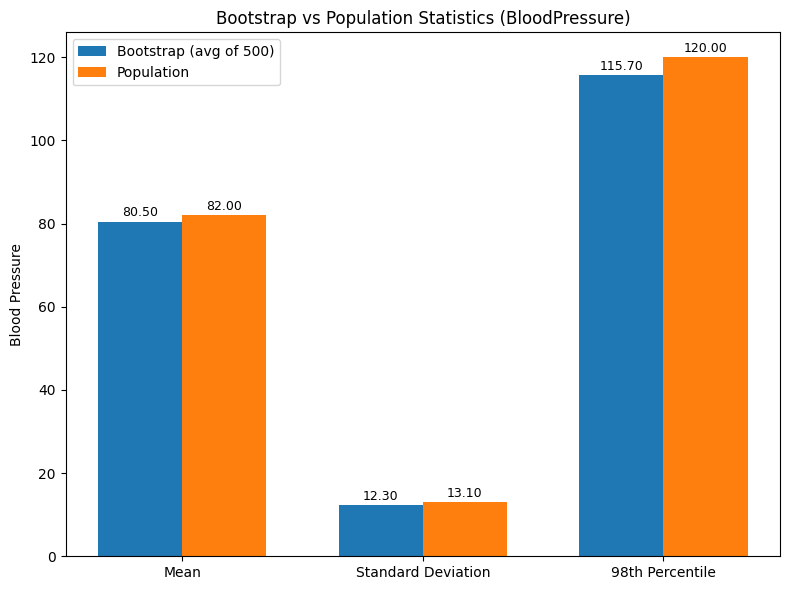

In [67]:
bootstrap_stats = {
    "Mean": 80.5,
    "Standard Deviation": 12.3,
    "98th Percentile": 115.7
}

population_stats = {
    "Mean": 82.0,
    "Standard Deviation": 13.1,
    "98th Percentile": 120.0
}

labels = list(bootstrap_stats.keys())
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width / 2, list(bootstrap_stats.values()), width, label='Bootstrap (avg of 500)', color='#1f77b4')  # Blue
bars2 = ax.bar(x + width / 2, list(population_stats.values()), width, label='Population', color='#ff7f0e')  # Orange
ax.set_ylabel('Blood Pressure')
ax.set_title('Bootstrap vs Population Statistics (BloodPressure)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}',
            ha='center', va='bottom', fontsize=9)

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()
